## Find the Periodicity of Economic Data Based on the Periodogram

In [2]:
#Import packages and functions
from packages import *
from functions import *
%matplotlib inline

In [3]:
#Directory path which has the data
direc='/home/samuel/Documents/PhD/code/data/'

#Directory to save plots in 
direc_save='/home/samuel/Documents/PhD/code/plots/'

#Add file names of nominal GDP (NGDP) and M4 money supply data
NGDP=direc+'UKNGDP.csv'
M4=direc+'UKM4.csv'

For a time series $\{x_n\}_{n=0}^{N-1}$ we define the discrete Fourier transform as $ \{ X_k \}_{k=0}^{N-1}$ where 

\begin{equation*}
X_k := \sum_{n=0}^{N-1} x_n e^{-\frac{2 \pi i kn }{N}}.
\end{equation*}

The periodogram is defined by the points $\{I(\omega_k)\}_{k=0}^{N-1}$ with 
frequency $\omega_k = \frac{2 \pi k }{N}$ and 

\begin{equation*}
I(\omega_k):= \frac{ |X_k|^2}{N}.
\end{equation*}

In [4]:
#Defining the periodogram with a function
def periodogram(x):
    N=len(x)
    Y=np.fft.fft(x)
    p=1/N*np.absolute(Y)**2
    return p

# M4

In [5]:
#M4 read data for 1963-2018
dataM4=pd.read_csv(M4)
dataM4=dataM4.values
xM4=dataM4[:,0]
yM4=dataM4[:,1]
yM4=yM4.astype(np.float)

dates=np.concatenate((xM4[0:24][::-1],xM4[24:len(xM4)][::-1]))

datesM4=np.arange(1963,2018.5,0.25)

M4v=np.concatenate((yM4[0:24][::-1],yM4[24:len(yM4)][::-1]))

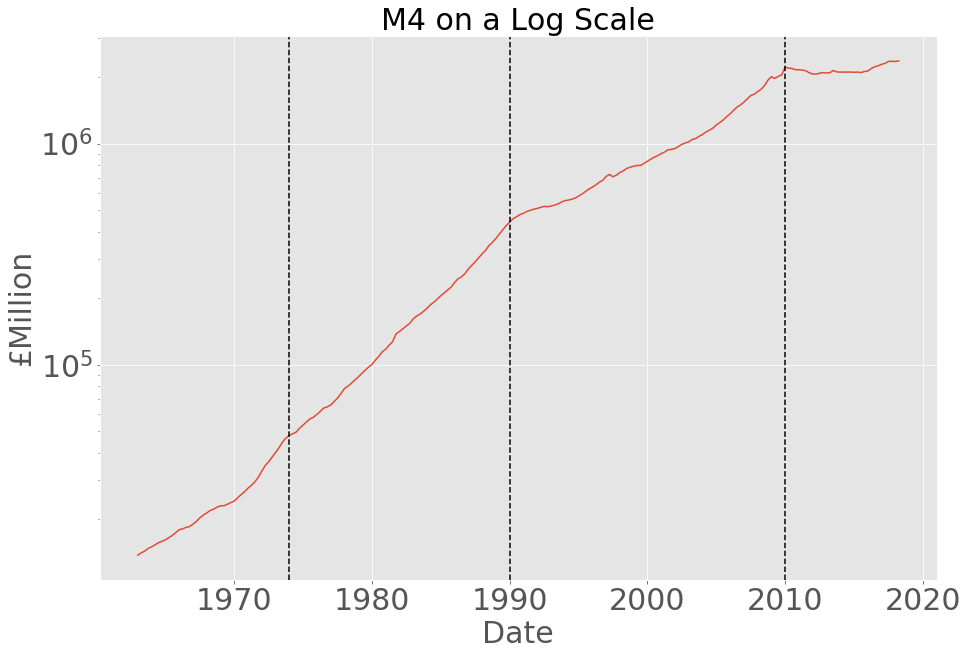

In [6]:
#Plot the M4 quarterly data on a log scale
plt.figure(figsize=(15,10))
plt.plot(datesM4,M4v)
plt.title('M4 on a Log Scale',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('£Million',fontsize=30)
plt.yscale('log')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(1974,color='black',linestyle='--')
plt.axvline(1990,color='black',linestyle='--')
plt.axvline(2010,color='black',linestyle='--')

For a time series $\{x_i\}_{i=1}^N$ we define the rate of change as 
$\{\frac{x_{i+1}}{x_i}\}_{i=1}^{N-1}$.

In [7]:
#Make the rate of change of M4 time series data, note it's length is one less than the original data
datesM4roc=datesM4[1:len(datesM4)]
M4_rate_of_change=rate_of_change(M4v) #rate of change function in functions file


#Smooth the M4 rate of change with a four-fold running average, note this is 4 less than original data
M4roc_smooth=running_mean(M4_rate_of_change,4) #running mean function in function file
datesM4roc_smooth=datesM4roc[3:len(datesM4roc)]

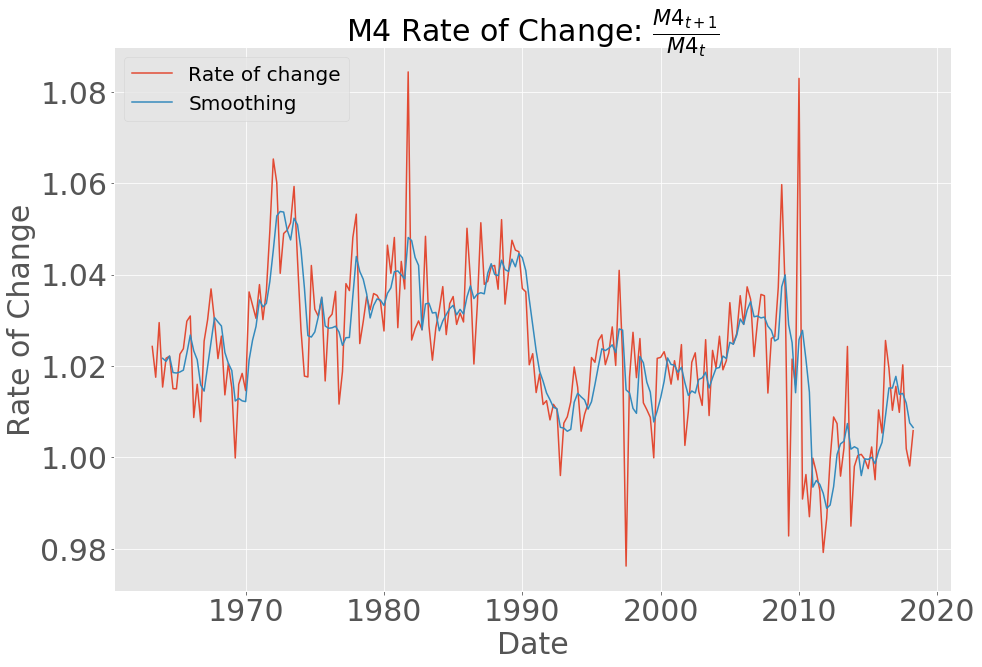

In [8]:
#Plot of M4 rate of change and four-fold smoothed data
plt.figure(figsize=(15,10))
plt.plot(datesM4roc,M4_rate_of_change,label='Rate of change')
plt.plot(datesM4roc_smooth,M4roc_smooth,label='Smoothing')
plt.title(r'M4 Rate of Change: $\frac{M4_{t+1}}{M4_{t}}$',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Rate of Change',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [9]:
#Import adfuller function from package
from statsmodels.tsa.stattools import adfuller

/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
a1=adfuller(M4_rate_of_change)
a2=adfuller(M4roc_smooth)

print(a1)
print('')
print(a2)

#Augmented Dickey Fuller test => both not stationary (second value is p-value)

(-2.2811978956606733, 0.1781037445543382, 4, 216, {'1%': -3.4609922013325267, '5%': -2.875015740963014, '10%': -2.5739524288408777}, -1199.1742735208095)

(-1.9734162608091859, 0.2983493803296856, 13, 204, {'1%': -3.462818103072159, '5%': -2.8758145932936805, '10%': -2.574378674548251}, -1690.8280604636843)


Want to make rate of change data stationary. Can do this by dividing by the regression tree of the data.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [11]:
#Import regression tree package
from sklearn.tree import DecisionTreeRegressor

In [12]:
#Define regression trees with max-depth 2 or 3
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2= DecisionTreeRegressor(max_depth=3)

#Reshape the rate of change smoothed data in form for regression tree function to work
xM4smooth=datesM4roc_smooth.reshape(-1,1)
yM4smooth=M4roc_smooth.reshape(-1,1)

#Fit on the smoothed data with both depths
regr_1.fit(xM4smooth,yM4smooth)
regr_2.fit(xM4smooth,yM4smooth)

#Predict on the same data to get values for regression tree
y_1M4smooth = regr_1.predict(xM4smooth)
y_2M4smooth = regr_2.predict(xM4smooth)

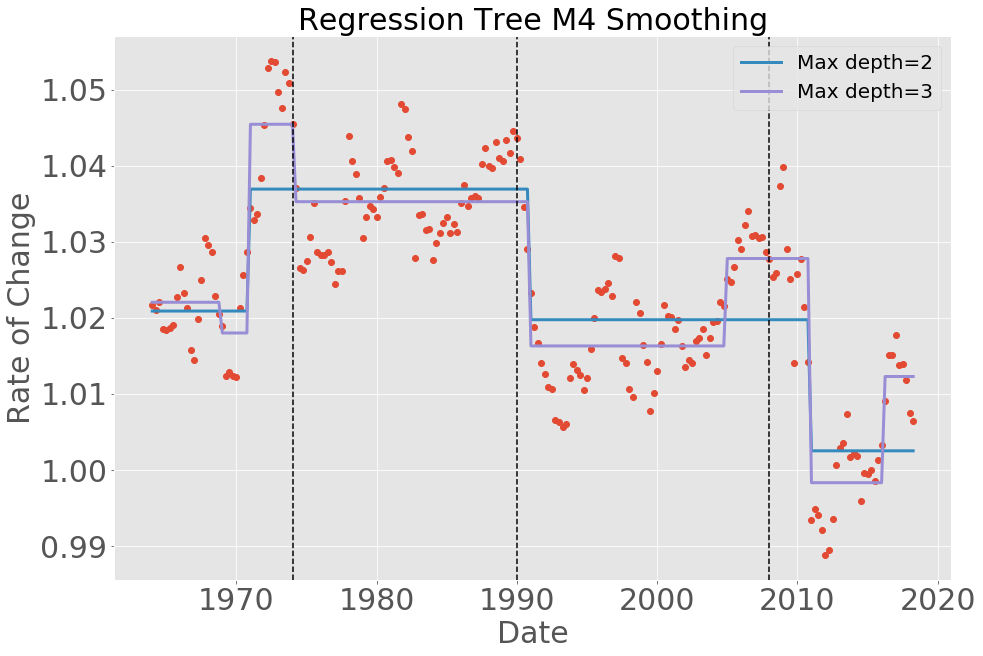

In [13]:
#Plot the smoothed data and the regression trees with max depth 2 and 3

plt.figure(figsize=(15,10))
plt.plot(xM4smooth,yM4smooth,'o')
plt.plot(xM4smooth,y_1M4smooth,linewidth=3,label='Max depth=2')
plt.plot(xM4smooth,y_2M4smooth,linewidth=3,label='Max depth=3')
plt.title('Regression Tree M4 Smoothing',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Rate of Change',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(1974,color='black',linestyle='--')
plt.axvline(1990,color='black',linestyle='--')
plt.axvline(2008,color='black',linestyle='--')
plt.legend(fontsize=20)

Use method of calculating MSEs to prevent overfitting, result highly dependent on training and testing set

https://datascience.stackexchange.com/questions/26640/how-to-check-for-overfitting-with-svm-and-iris-data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=xM4smooth
y=yM4smooth

#Split data randomly into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=51)

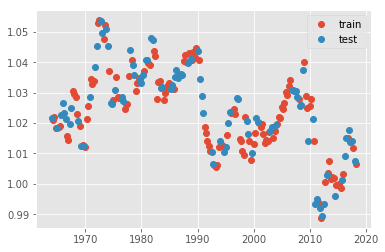

In [15]:
#Plot of training and testing set
plt.plot(X_train,y_train,'o',label='train')
plt.plot(X_test,y_test,'o',label='test')
plt.legend(fontsize=10)

In [16]:
#Predictions on training set
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2= DecisionTreeRegressor(max_depth=3)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)


predictions1tr=regr_1.predict(X_train)
predictions2tr=regr_2.predict(X_train)

print(mean_squared_error(predictions1tr,y_train)) #Note very small mean squared error due 
#to small differences in data values
print(mean_squared_error(predictions2tr,y_train))


5.001108694783275e-05
3.0405273901894076e-05


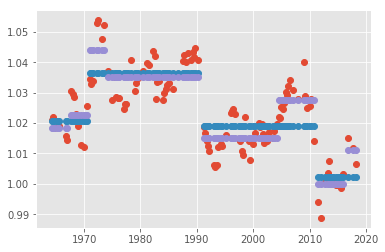

In [17]:
#Plot of regression tree and training data
plt.plot(X_train,y_train,'o')
plt.plot(X_train,predictions1tr,'o')
plt.plot(X_train,predictions2tr,'o')

In [18]:
#Mean squared error for prediction on training and test sets after fitting on training data
#for different depths of tree
MSE_train=[]
MSE_test=[]
for k in range(1,10):
    regr = DecisionTreeRegressor(max_depth=k)
    regr.fit(X_train,y_train)
    predictions_train=regr.predict(X_train)
    predictions_test=regr.predict(X_test)
    mse_train=mean_squared_error(predictions_train,y_train)
    mse_test=mean_squared_error(predictions_test,y_test)
    MSE_train.append(mse_train)
    MSE_test.append(mse_test)

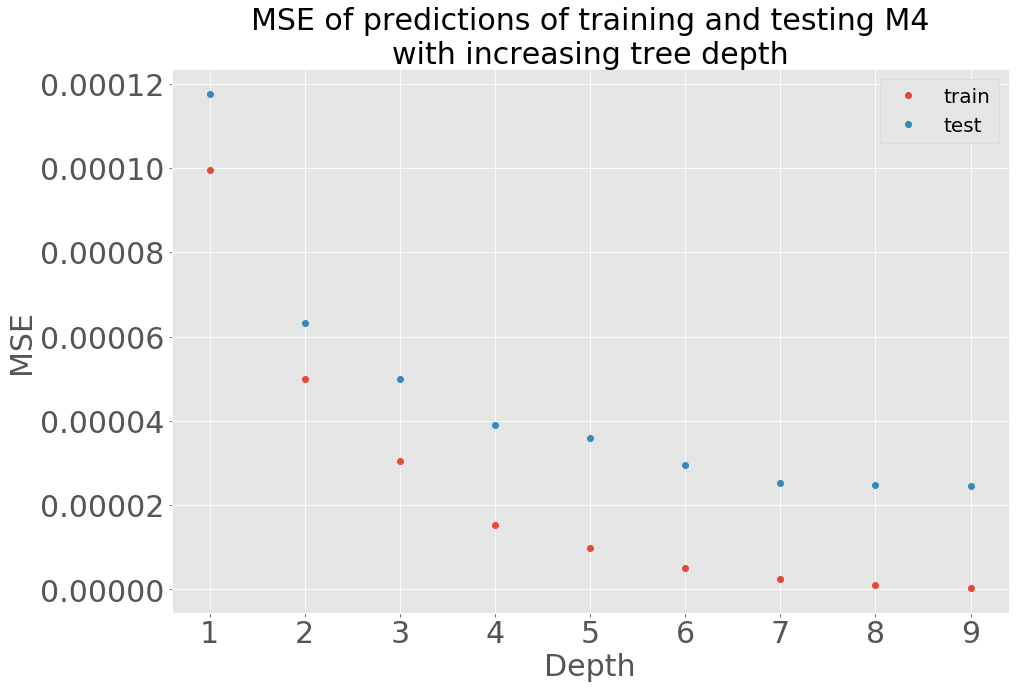

In [50]:
#Plot of MSE of predictions on training and testing set
plt.figure(figsize=(15,10))
r=range(1,10)
plt.plot(r,MSE_train,'o',label='train')
plt.plot(r,MSE_test,'o',label='test')

plt.title(r"MSE of predictions of training and testing M4" "\n" r"with increasing tree depth",fontsize=30)
plt.xlabel('Depth',fontsize=30)
plt.ylabel('MSE',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

K-fold cross-validation with different depths of decision tree
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [20]:
from sklearn.model_selection import KFold

#10 folds
kf = KFold(n_splits=10)

s=kf.get_n_splits(X)

t=10

#Define matrix to hold MSE: rows are for the depth, columns for the split
MSE=np.zeros((t,s))



for k in range(1,t+1):
    count=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr = DecisionTreeRegressor(max_depth=k)
        regr.fit(X_train,y_train)
        prediction = regr.predict(X_test)
        mse=mean_squared_error(prediction,y_test)
        MSE[k-1,count]=mse
        count+=1
        

In [21]:
print(len(X_train))
print(len(X))

197
218


In [22]:
#Find the mean of the MSEs of the depths of each of the rows
MSE_mean=[]

for i in range(t):
    MSE_mean.append(np.mean(MSE[i,:]))

In [23]:
#Find the depth with minimum mean squared error, note dependant on number of folds
a=np.asarray(MSE_mean,float)
np.where(a == a.min())

mymin = np.min(a)
min_positions = [i for i, x in enumerate(a) if x == mymin]

m=min_positions[0]+1

print(m)

3

(array([8.0e-05, 1.0e-04, 1.2e-04, 1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04]),
 <a list of 7 Text yticklabel objects>)

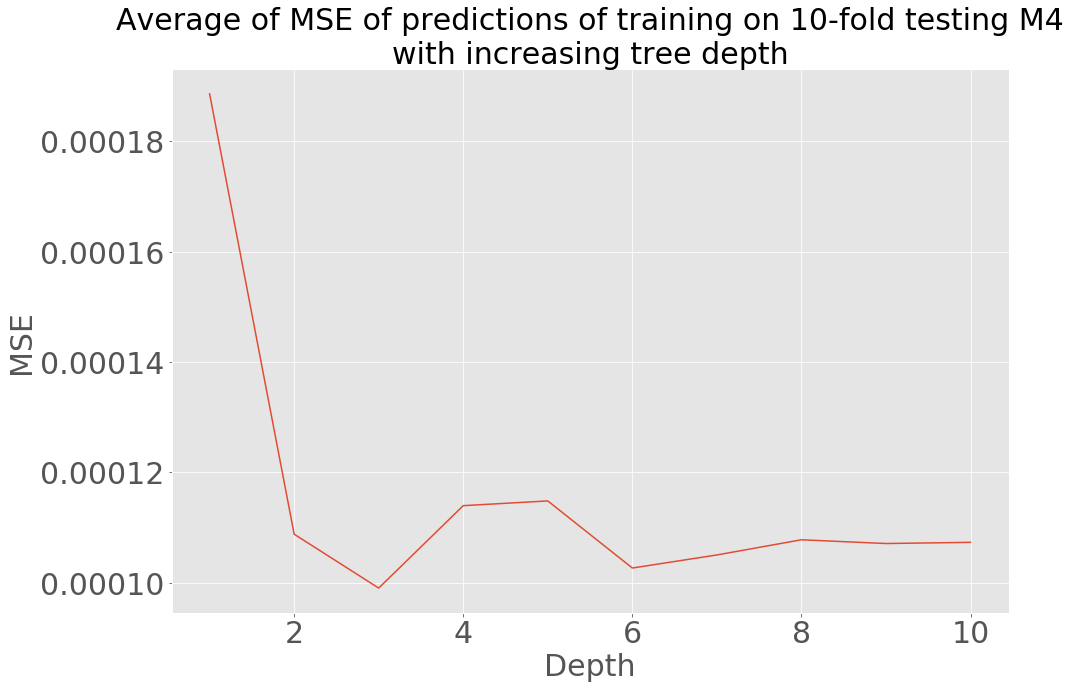

In [51]:
#Plot of 10-fold MSE on testing set
plt.figure(figsize=(15,10))
r=range(1,t+1)
plt.plot(r,MSE_mean)

plt.title(r"Average of MSE of predictions of training on 10-fold testing M4" "\n" r"with increasing tree depth",fontsize=30)
plt.xlabel('Depth',fontsize=30)
plt.ylabel('MSE',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Hodrick Prescott Filter M4

Common method to detrend data and make stationary

https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html

# Start

In [25]:
import statsmodels.api as sm

cycleM4roc, trendM4roc = sm.tsa.filters.hpfilter(M4roc_smooth, 1600) #finds cyclical and trend component
#using HP filter

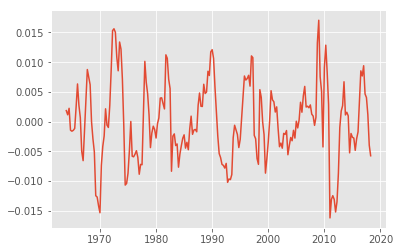

In [26]:
#plot of cyclic component
plt.plot(xM4smooth,cycleM4roc)

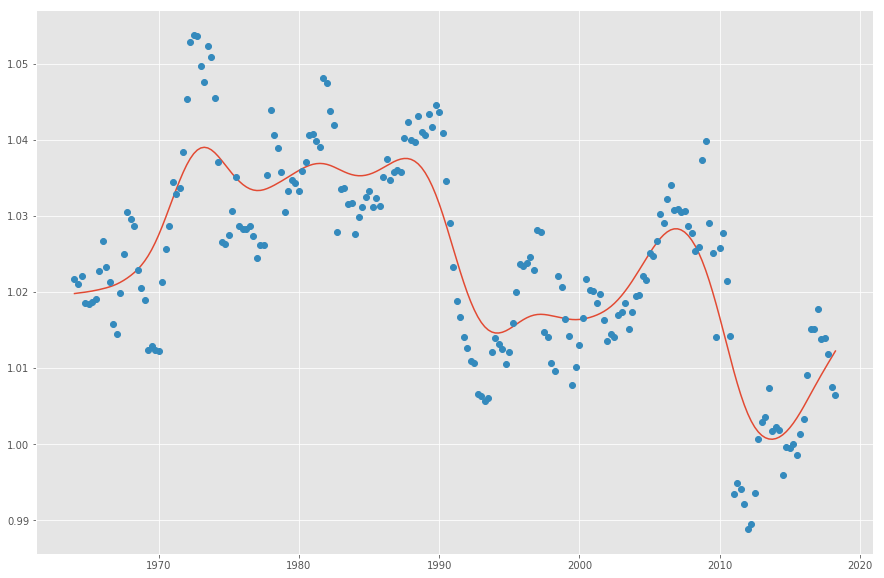

In [27]:
#Plot of trend component on rate of change data for M4
plt.figure(figsize=(15,10))
plt.plot(xM4smooth,trendM4roc)
plt.plot(xM4smooth,yM4smooth,'o')

In [28]:
#Augmented Dickey Fuller test, p-value <0.01 => accept null that data is stationary
adfuller(cycleM4roc)

(-5.324608409242839,
 4.868253315234428e-06,
 13,
 204,
 {'1%': -3.462818103072159,
  '10%': -2.574378674548251,
  '5%': -2.8758145932936805},
 -1736.3592079176)

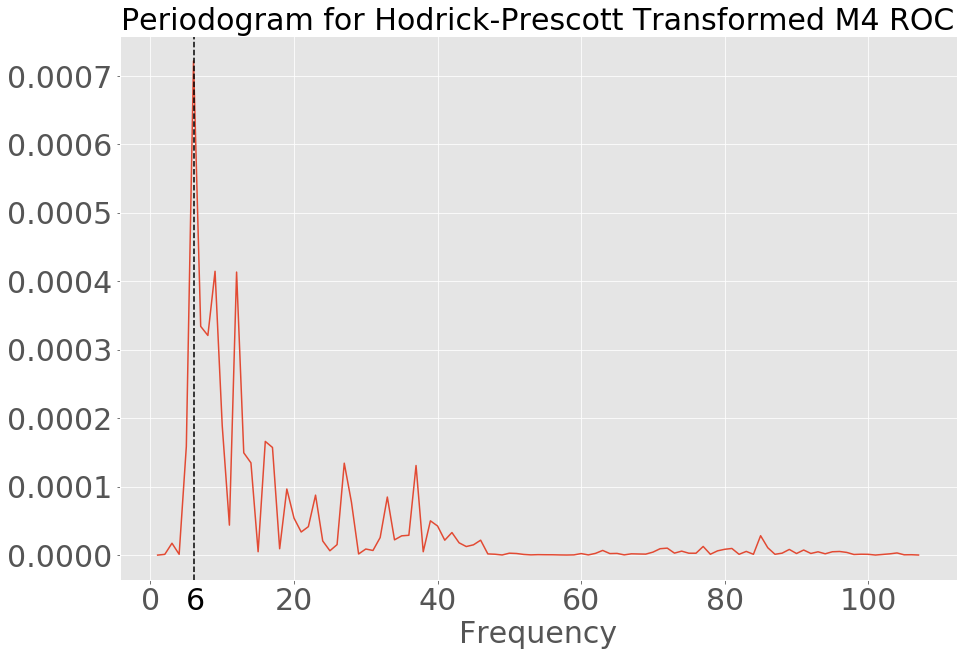

In [29]:
#Periodogram of rate of change of M4 of cyclic component
plt.figure(figsize=(15,10))
p=periodogram(cycleM4roc)

q=int((len(p)-1)/2)
plt.plot(range(1,q),p[1:q])
plt.title('Periodogram for Hodrick-Prescott Transformed M4 ROC',fontsize=30)
plt.xlabel('Frequency',fontsize=30) 

plt.axvline(6,color='black',linestyle='--')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.text(5,-0.00008,'6',fontsize=30)

plt.savefig(direc_save+'M4_HP_periodogram')

# End

In [30]:
#Transform M4 roc data by dividing by decision tree with max-depth 2
M4roc_transform1=M4roc_smooth/y_1M4smooth

#Second transform M4 roc data by taking logs of previous transform
M4roc_transform2=np.log(M4roc_smooth/y_1M4smooth)

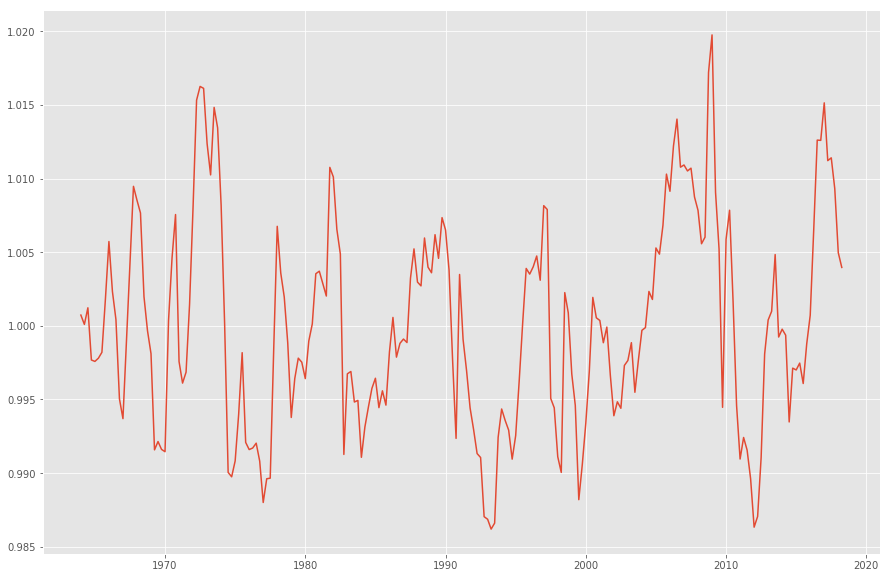

In [31]:
#Plot of transformed data with first transform
plt.figure(figsize=(15,10))
plt.plot(xM4smooth,M4roc_transform1)

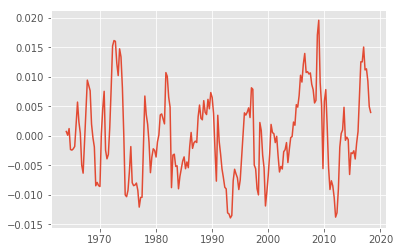

In [32]:
#Plot of transformed data with second transform
plt.plot(xM4smooth,M4roc_transform2)

In [33]:
#Augmented Dickey-Fuller test on first transform
adfuller(M4roc_transform1)

(-4.477375839137053,
 0.00021600173939185447,
 10,
 207,
 {'1%': -3.4623415245233145,
  '10%': -2.574267439846904,
  '5%': -2.875606128263243},
 -1697.325732914565)

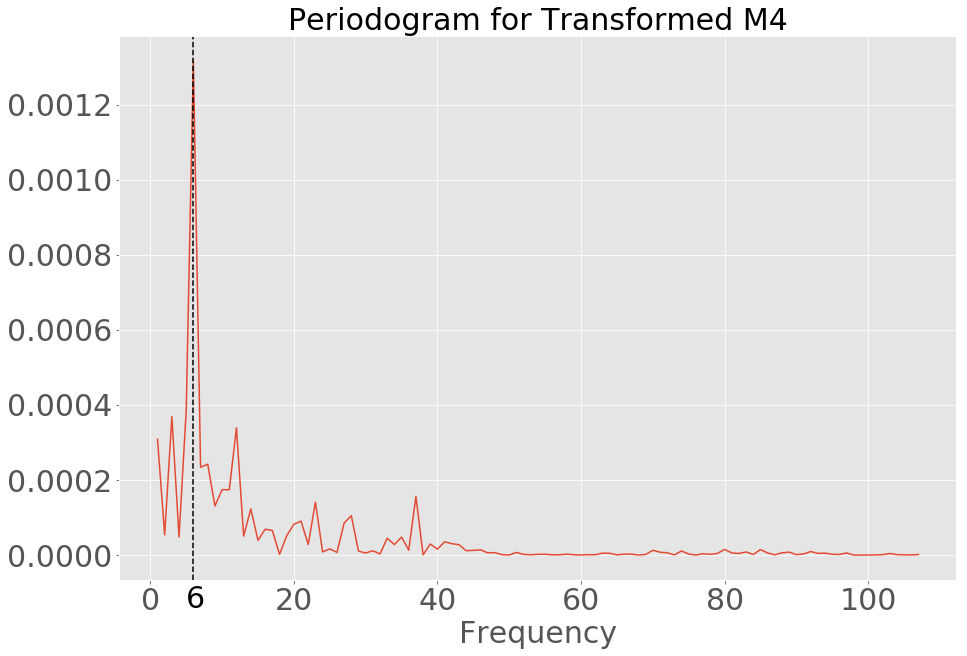

In [34]:
#Periodogram of transformed M4 data
plt.figure(figsize=(15,10))
p=periodogram(M4roc_transform1)

q=int((len(p)-1)/2)# Periodogram symmetric, plot only first half
plt.plot(range(1,q),p[1:q]) #Don't include 0th frequency as it is so comparably large and does not give 
#relevant info
plt.title('Periodogram for Transformed M4',fontsize=30)
plt.xlabel('Frequency',fontsize=30)

plt.axvline(6,color='black',linestyle='--')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.text(5,-0.00014,'6',fontsize=30)

plt.savefig(direc_save+'M4_periodogram')

In [41]:
#Fit periods based on the frequencies (divide total length of years by frequency)

r=xM4smooth[len(xM4smooth)-1]-xM4smooth[0]
r=r[0]
periodM4=[]

for i in range(1,q):
    periodM4.append(r/i)



In [42]:
periodM4h=round(periodM4[5],2)

In [43]:
print(periodM4h) #Period with frequency 6

9.04


Text(9,0,'9.04')

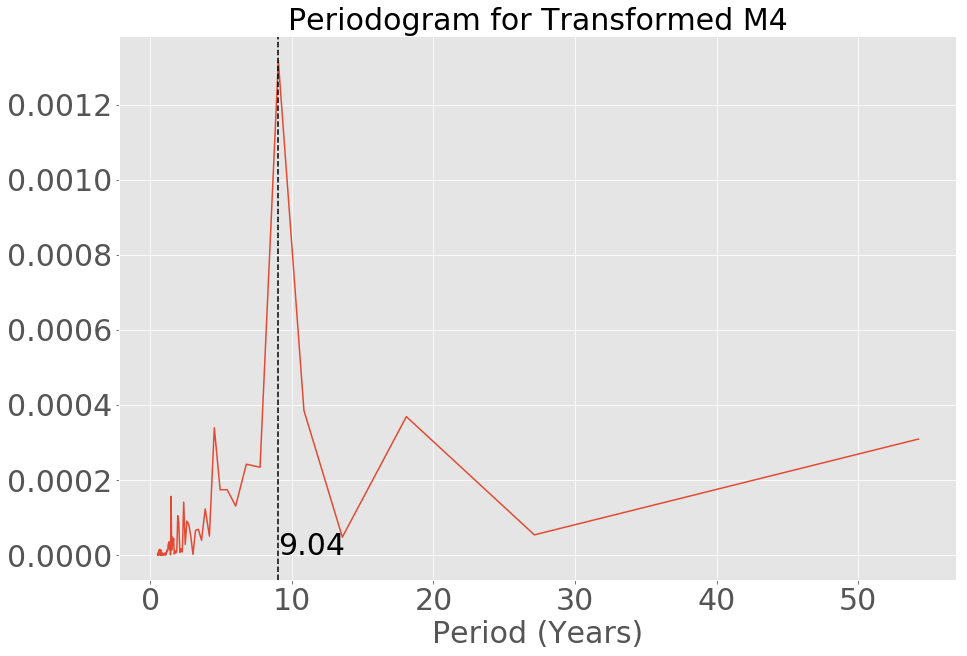

In [44]:
#Plot of periodogram with periods
plt.figure(figsize=(15,10))
p=periodogram(M4roc_transform1)

q=int((len(p)-1)/2)
plt.plot(periodM4,p[1:q])
plt.title('Periodogram for Transformed M4',fontsize=30)
plt.xlabel('Period (Years)',fontsize=30)


plt.axvline(periodM4[5],color='black',linestyle='--')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.text(9,0,'{c}'.format(c=periodM4h),fontsize=30)

In [45]:
#Find the beginning of each new cycle with period 6
periods=[]
years=[]
for i in range(1,6):
    per=xM4smooth[0][0]+i*periodM4[5]
    y=i*periodM4[5]
    periods.append(per)
    years.append(y)

In [47]:
periods
years

[9.041666666666666,
 18.083333333333332,
 27.125,
 36.166666666666664,
 45.20833333333333]

/home/samuel/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


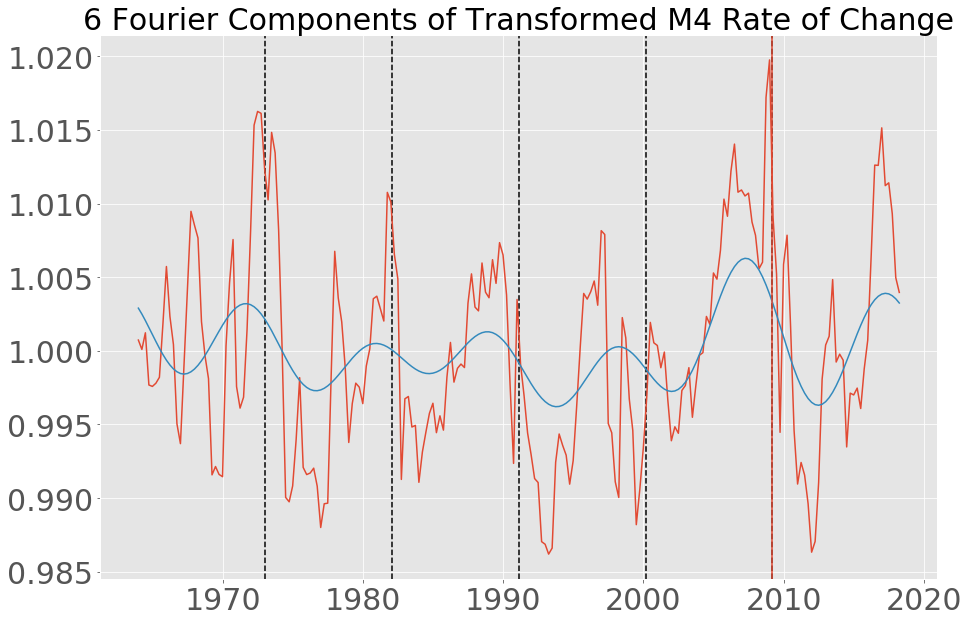

In [48]:
plt.figure(figsize=(15,10))
x=xM4smooth
y=M4roc_transform1

n = len(y)
Y=np.fft.fft(y)


for i in range(len(periods)):
    plt.axvline(periods[i],color='black',linestyle='--')

c=6

#Inverse Fourier transform of first 6 componenets
np.put(Y, range(c+1, n), 0.0)

ifft=np.fft.ifft(Y)

plt.plot(x,y)
plt.plot(x,ifft)

plt.title('{c} Fourier Components of Transformed M4 Rate of Change'.format(c=c),fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.axvline(per)
plt.savefig(direc_save+'M4_inv_period')

Autocorrelation defined as:
\begin{equation*}
r_k = \displaystyle
\dfrac{\sum\limits_{t=1}^{N-k} (x_k-\bar{x})(x_{t+k}-\bar{x})}{\sum\limits_{t=1}^N(x_t-\bar{x})^2}.
\end{equation*}

In [49]:
#Find the time in years starting with first data value at 0
xs=np.arange(0,(len(xM4smooth)-1)/4,0.25)

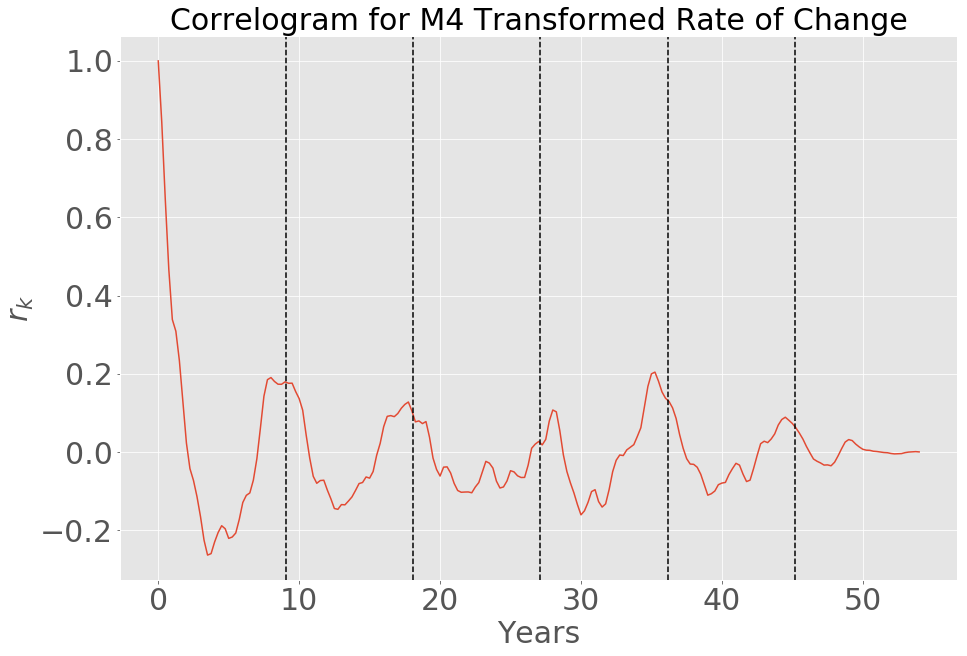

In [31]:
#Plot of correlogram for M4 transformed rate of change
plt.figure(figsize=(15,10))
plt.plot(xs,AUT1(M4roc_transform1))
plt.title('Correlogram for M4 Transformed Rate of Change',fontsize=30)
plt.ylabel(r'$r_k$',fontsize=30)
plt.xlabel('Years',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

for i in range(len(years)):
    plt.axvline(years[i],color='black',linestyle='--')
plt.savefig(direc_save+'M4_cor')

# NGDP 

Do same as for M4 data but on NGDP

In [52]:
dataNGDP=pd.read_csv(NGDP)
dataNGDP=dataNGDP.values
NGDPx=dataNGDP[:,0] #dates 1955-2018, quarterly, strings
NGDPy=dataNGDP[:,1]
NGDP=NGDPy.astype(np.float) #NGDP as float

datesNGDP=np.arange(1955,2018.25,0.25)

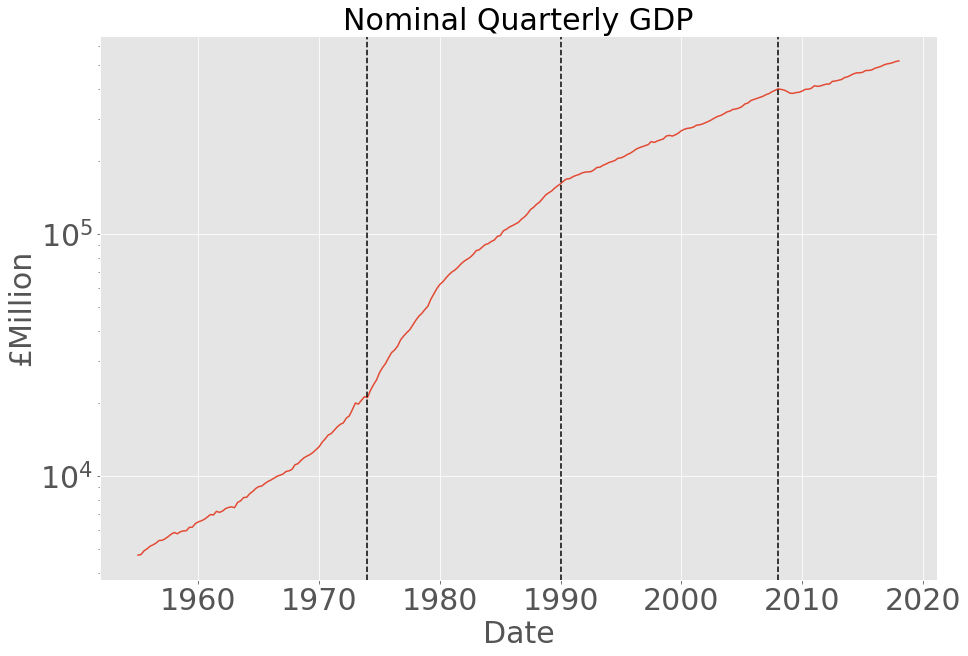

In [53]:
plt.figure(figsize=(15,10))
plt.plot(datesNGDP,NGDP)
plt.title('Nominal Quarterly GDP',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('£Million',fontsize=30)
plt.yscale('log')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(1974,color='black',linestyle='--')
plt.axvline(1990,color='black',linestyle='--')
plt.axvline(2008,color='black',linestyle='--')

In [54]:
NGDP_rate_of_change=rate_of_change(NGDP)
datesNGDProc=datesNGDP[1:len(datesNGDP)]

NGDProc_smooth=running_mean(NGDP_rate_of_change,4)
datesNGDProc_smooth=datesNGDProc[3:len(datesNGDProc)]

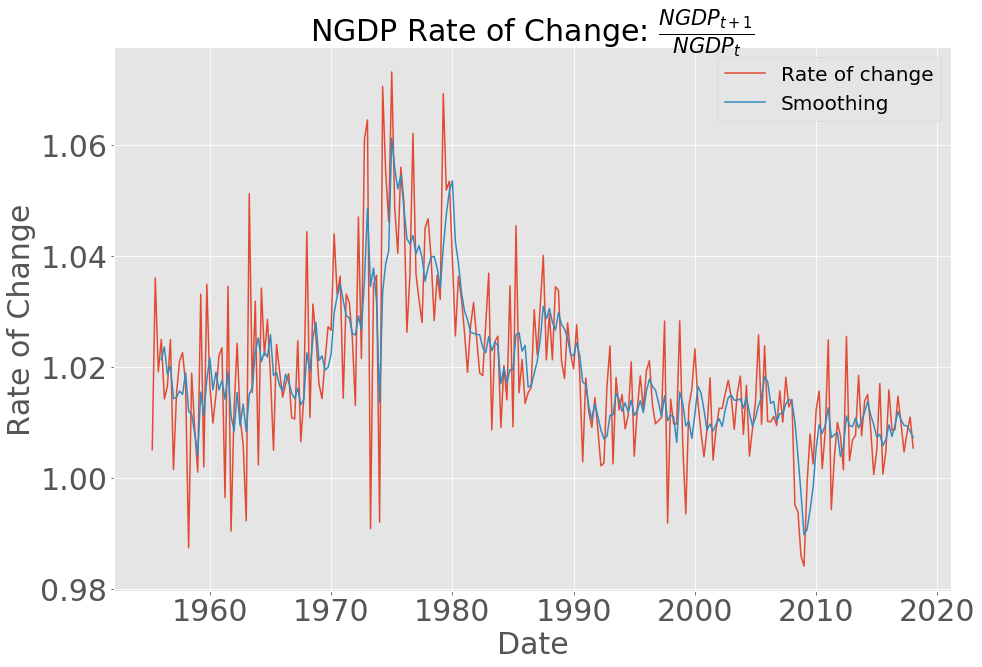

In [55]:
plt.figure(figsize=(15,10))
plt.plot(datesNGDProc,NGDP_rate_of_change,label='Rate of change')
plt.plot(datesNGDProc_smooth,NGDProc_smooth,label='Smoothing')
plt.title(r'NGDP Rate of Change: $\frac{NGDP_{t+1}}{NGDP_{t}}$',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Rate of Change',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

In [56]:
n1=adfuller(NGDP_rate_of_change)
n2=adfuller(NGDProc_smooth)

print(n1)
print('')
print(n2)

(-1.4723999911588679, 0.5471178235974683, 9, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, -1411.3998558634107)

(-1.0179339807926562, 0.7466672257916063, 16, 232, {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}, -1989.1966948836025)


In [57]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2= DecisionTreeRegressor(max_depth=3)

xNGDPsmooth=datesNGDProc_smooth.reshape(-1,1)
yNGDPsmooth=NGDProc_smooth.reshape(-1,1)

regr_1.fit(xNGDPsmooth,yNGDPsmooth)
regr_2.fit(xNGDPsmooth,yNGDPsmooth)

y_1NGDPsmooth = regr_1.predict(xNGDPsmooth)
y_2NGDPsmooth = regr_2.predict(xNGDPsmooth)

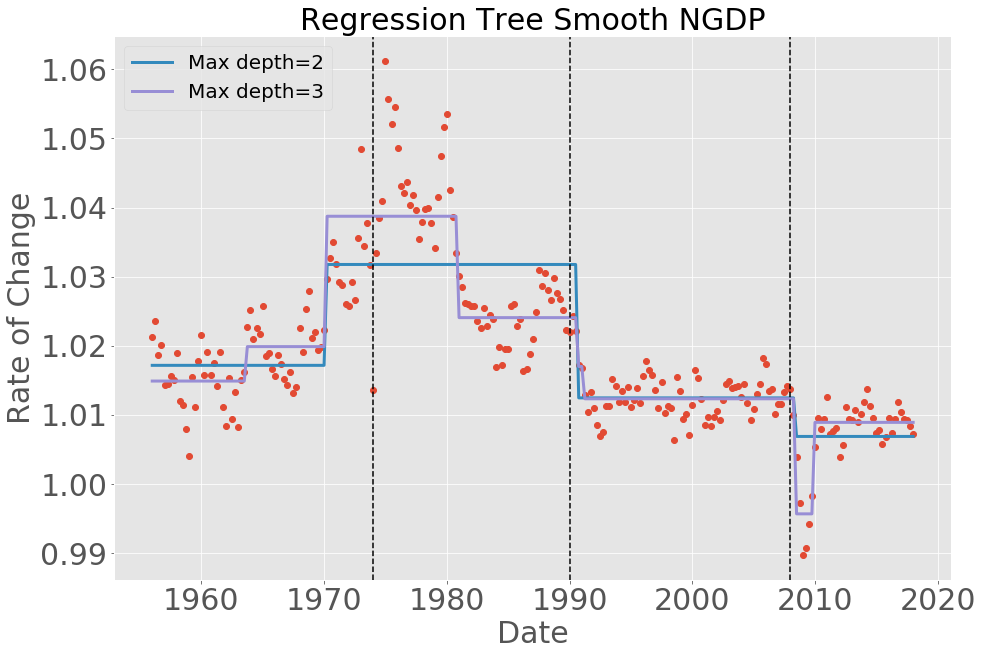

In [58]:
plt.figure(figsize=(15,10))
plt.plot(xNGDPsmooth,yNGDPsmooth,'o')
plt.plot(xNGDPsmooth,y_1NGDPsmooth,linewidth=3,label='Max depth=2')
plt.plot(xNGDPsmooth,y_2NGDPsmooth,linewidth=3,label='Max depth=3')
plt.title('Regression Tree Smooth NGDP',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Rate of Change',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(1974,color='black',linestyle='--')
plt.axvline(1990,color='black',linestyle='--')
plt.axvline(2008,color='black',linestyle='--')
plt.legend(fontsize=20)

In [59]:
X=xNGDPsmooth
y=yNGDPsmooth

#Split data randomly into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=51)

In [60]:
#Predictions on training set
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2= DecisionTreeRegressor(max_depth=3)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)


predictions1tr=regr_1.predict(X_train)
predictions2tr=regr_2.predict(X_train)

print(mean_squared_error(predictions1tr,y_train)) #Note very small mean squared error due 
#to small differences in data values
print(mean_squared_error(predictions2tr,y_train))

4.3397860347069925e-05
2.0779190024722488e-05


In [61]:
#Mean squared error for prediction on training and test sets after fitting on training data
#for different depths of tree
MSE_train=[]
MSE_test=[]
for k in range(1,10):
    regr = DecisionTreeRegressor(max_depth=k)
    regr.fit(X_train,y_train)
    predictions_train=regr.predict(X_train)
    predictions_test=regr.predict(X_test)
    mse_train=mean_squared_error(predictions_train,y_train)
    mse_test=mean_squared_error(predictions_test,y_test)
    MSE_train.append(mse_train)
    MSE_test.append(mse_test)

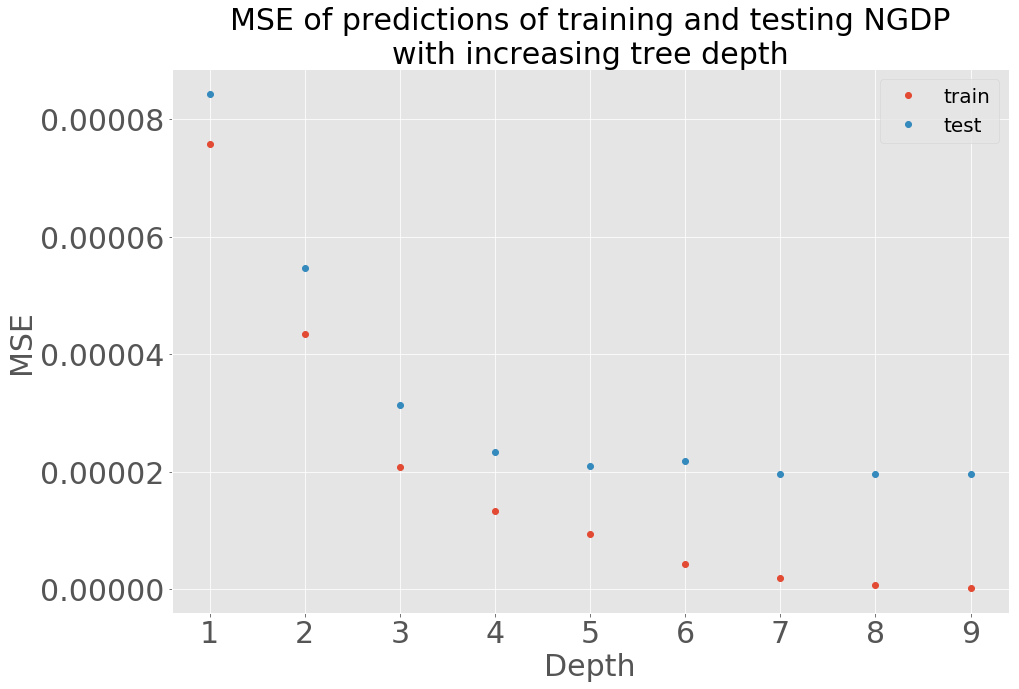

In [62]:
plt.figure(figsize=(15,10))
r=range(1,10)
plt.plot(r,MSE_train,'o',label='train')
plt.plot(r,MSE_test,'o',label='test')

plt.title(r"MSE of predictions of training and testing NGDP" "\n" r"with increasing tree depth",fontsize=30)
plt.xlabel('Depth',fontsize=30)
plt.ylabel('MSE',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

In [69]:
kf = KFold(n_splits=10)

s=kf.get_n_splits(X)

t=10

#Define matrix to hold MSE: rows are for the depth, columns for the split
MSE=np.zeros((t,s))

for k in range(1,t+1):
    count=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr = DecisionTreeRegressor(max_depth=k)
        regr.fit(X_train,y_train)
        prediction = regr.predict(X_test)
        mse=mean_squared_error(prediction,y_test)
        MSE[k-1,count]=mse
        count+=1

#Find the mean of the MSEs of the depths of each of the rows
MSE_mean=[]

for i in range(t):
    MSE_mean.append(np.mean(MSE[i,:]))

#Find the depth with minimum mean squared error, note dependant on number of folds
a=np.asarray(MSE_mean,float)
np.where(a == a.min())

mymin = np.min(a)
min_positions = [i for i, x in enumerate(a) if x == mymin]

m=min_positions[0]+1

print(m)

9


(array([5.0e-05, 6.0e-05, 7.0e-05, 8.0e-05, 9.0e-05, 1.0e-04, 1.1e-04]),
 <a list of 7 Text yticklabel objects>)

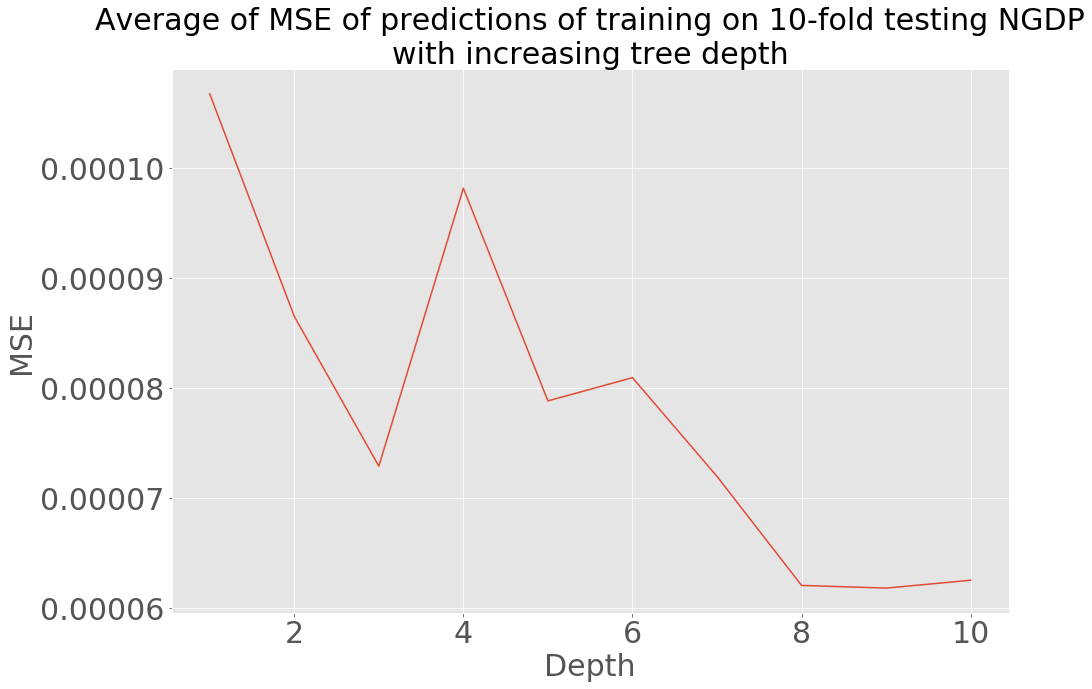

In [70]:
plt.figure(figsize=(15,10))
r=range(1,t+1)
plt.plot(r,MSE_mean)

plt.title(r"Average of MSE of predictions of training on 10-fold testing NGDP" "\n" r"with increasing tree depth",fontsize=30)
plt.xlabel('Depth',fontsize=30)
plt.ylabel('MSE',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [39]:
NGDProc_transform=NGDProc_smooth/y_2NGDPsmooth
NGDProc_transform1=NGDProc_smooth-y_2NGDPsmooth
NGDProc_transform2=NGDProc_smooth-np.mean(NGDProc_smooth)

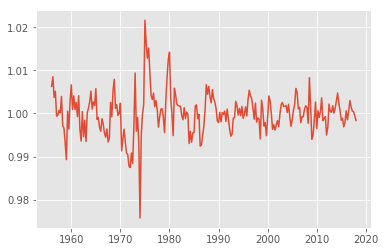

In [40]:
plt.plot(xNGDPsmooth,NGDProc_transform)

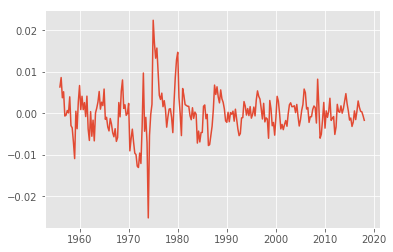

In [41]:
plt.plot(xNGDPsmooth,NGDProc_transform1)

In [42]:
adfuller(NGDProc_transform)

(-4.837461700262601,
 4.6087809423122956e-05,
 9,
 239,
 {'1%': -3.458010773719797,
  '10%': -2.5732559963936206,
  '5%': -2.8737103617125186},
 -1955.5779257975137)

# Hodrick Prescott Filter NGDP 

# Start

In [43]:
cycleNGDProc, trendNGDProc = sm.tsa.filters.hpfilter(NGDProc_smooth, 1600)

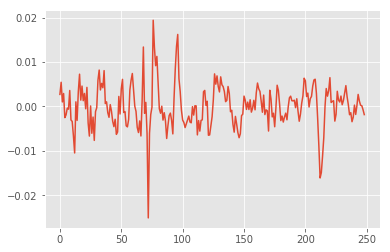

In [44]:
plt.plot(cycleNGDProc)

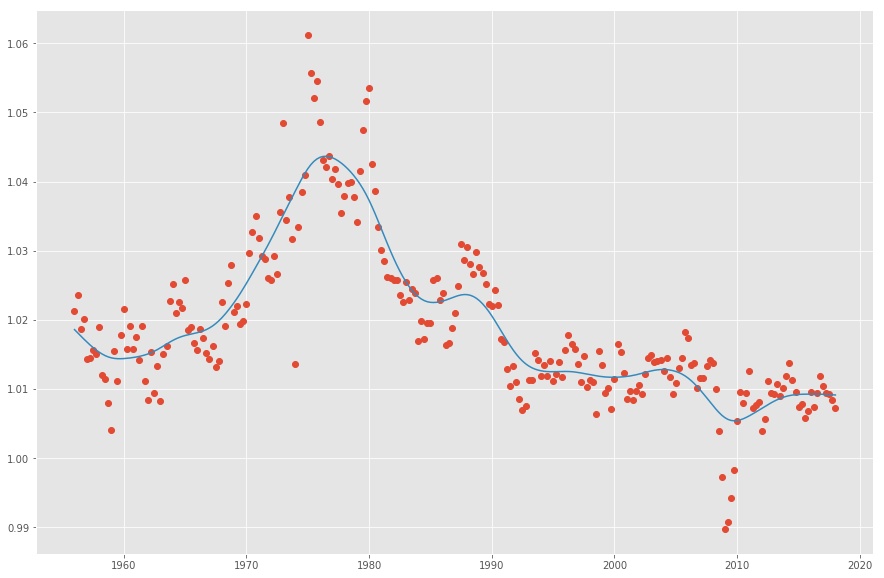

In [45]:
plt.figure(figsize=(15,10))
plt.plot(xNGDPsmooth,yNGDPsmooth,'o')
plt.plot(xNGDPsmooth,trendNGDProc)

In [46]:
adfuller(cycleNGDProc)

(-4.2339839758735165,
 0.0005768548822950376,
 16,
 232,
 {'1%': -3.458854867412691,
  '10%': -2.573453223097503,
  '5%': -2.8740800599399323},
 -2052.029850427906)

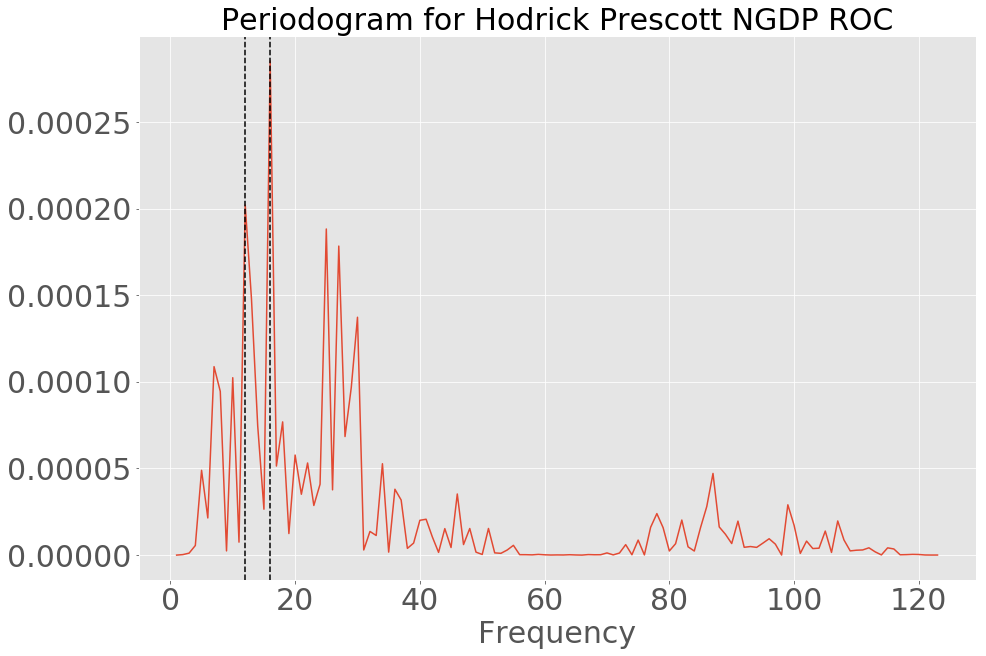

In [47]:
plt.figure(figsize=(15,10))
p1=periodogram(cycleNGDProc)

q1=int((len(p1)-1)/2)
plt.plot(range(1,q1),p1[1:q1])
plt.title('Periodogram for Hodrick Prescott NGDP ROC',fontsize=30)
plt.xlabel('Frequency',fontsize=30)

plt.axvline(12,color='black',linestyle='--')
plt.axvline(16,color='black',linestyle='--')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.savefig(direc_save+'NGDP_HP_periodogram')

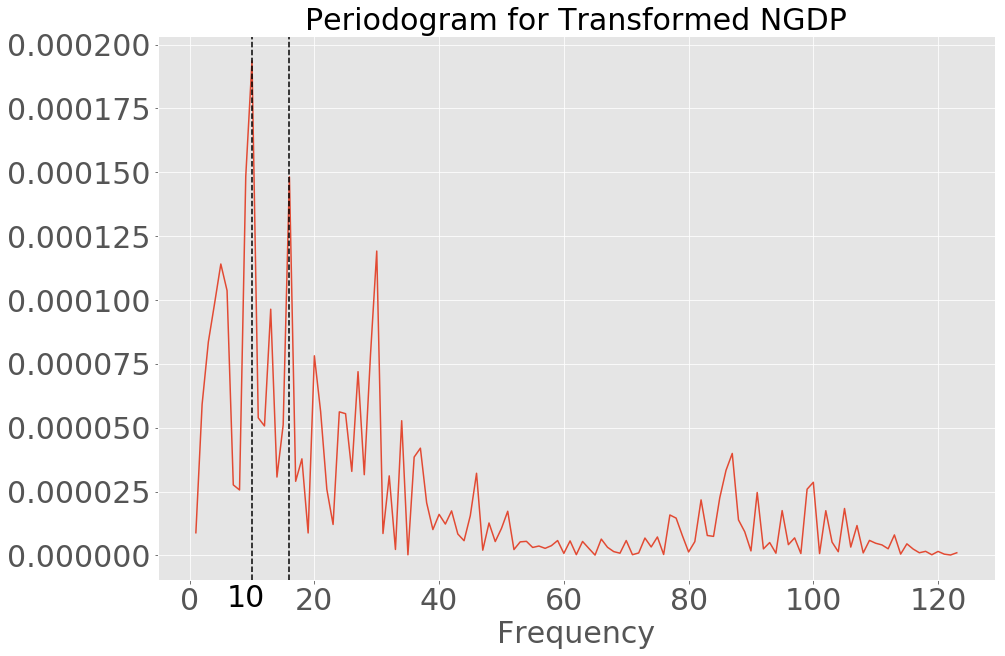

In [48]:
plt.figure(figsize=(15,10))
p1=periodogram(NGDProc_transform)

q1=int((len(p1)-1)/2)
plt.plot(range(1,q1),p1[1:q1])
plt.title('Periodogram for Transformed NGDP',fontsize=30)
plt.xlabel('Frequency',fontsize=30)

plt.axvline(10,color='black',linestyle='--')
plt.axvline(16,color='black',linestyle='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.text(6,-0.00002,'10',fontsize=30)
plt.savefig(direc_save+'NGDP_periodogram')

In [49]:
n2=len(NGDProc_transform)
r1=xNGDPsmooth[len(xNGDPsmooth)-1]-xNGDPsmooth[0]
r1=r1[0]
periodNGDP=[]

for i in range(1,q1):
    periodNGDP.append(r1/i)


In [50]:
periodNGDPh=round(periodNGDP[9],2)

Text(6,0,'6.2')

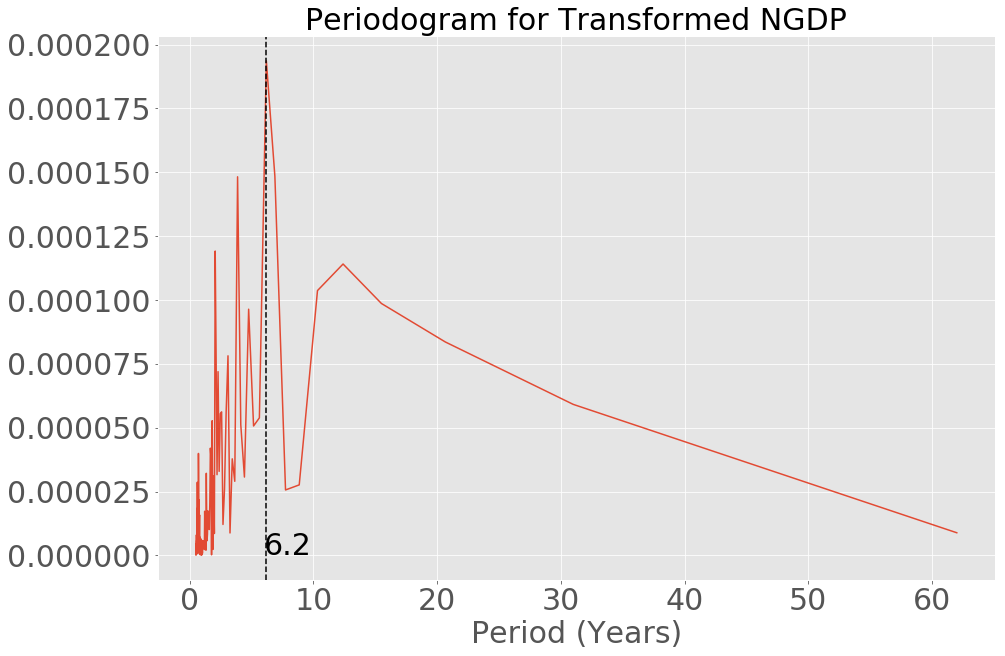

In [51]:
plt.figure(figsize=(15,10))
p1=periodogram(NGDProc_transform)

q1=int((len(p1)-1)/2)
plt.plot(periodNGDP,p1[1:q1])
plt.title('Periodogram for Transformed NGDP',fontsize=30)
plt.xlabel('Period (Years)',fontsize=30)

plt.axvline(periodNGDP[9],color='black',linestyle='--')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.text(6,0,'{c}'.format(c=periodNGDPh),fontsize=30)

In [52]:
periodNGDPh=round(periodNGDP[9],2)

periods1=[]

years1=[]

for i in range(1,10):
    per1=xNGDPsmooth[0][0]+periodNGDP[9]*i
    y1=periodNGDP[9]*i
    periods1.append(per1)
    years1.append(y1)

In [53]:
periods1

[1962.2, 1968.4, 1974.6, 1980.8, 1987.0, 1993.2, 1999.4, 2005.6, 2011.8]

/home/samuel/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


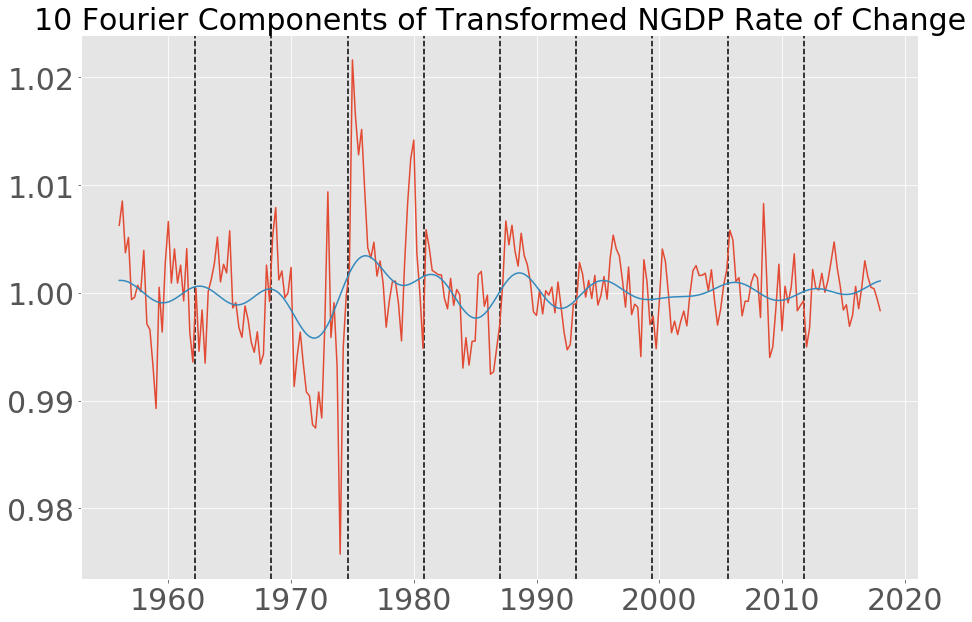

In [54]:
plt.figure(figsize=(15,10))
x1=xNGDPsmooth
y1=NGDProc_transform

n = len(y1)
Y1=np.fft.fft(y1)

for i in range(len(periods1)):
    plt.axvline(periods1[i],color='black',linestyle='--')



c=10
#np.put(Y1, range(0, c), 0.0)
np.put(Y1, range(c+1, n), 0.0)

ifft1=np.fft.ifft(Y1)

plt.plot(x1,y1)
plt.plot(x1,ifft1)

plt.title('{c} Fourier Components of Transformed NGDP Rate of Change'.format(c=c),fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.savefig(direc_save+'NGDP_inv_period')

In [55]:
xl=np.arange(0,(len(xNGDPsmooth)-1)/4,0.25)

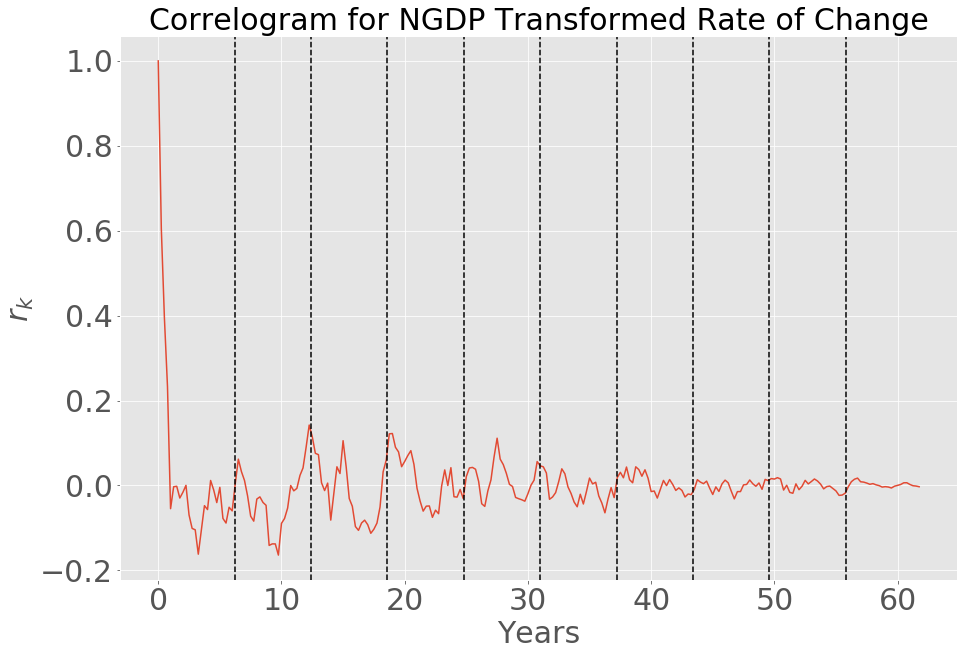

In [56]:
plt.figure(figsize=(15,10))
plt.plot(xl,AUT1(NGDProc_transform))

for i in range(len(years1)):
    plt.axvline(years1[i],color='black',linestyle='--')
plt.title('Correlogram for NGDP Transformed Rate of Change',fontsize=30)
plt.ylabel(r'$r_k$',fontsize=30)
plt.xlabel('Years',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig(direc_save+'NGDP_cor')

/home/samuel/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


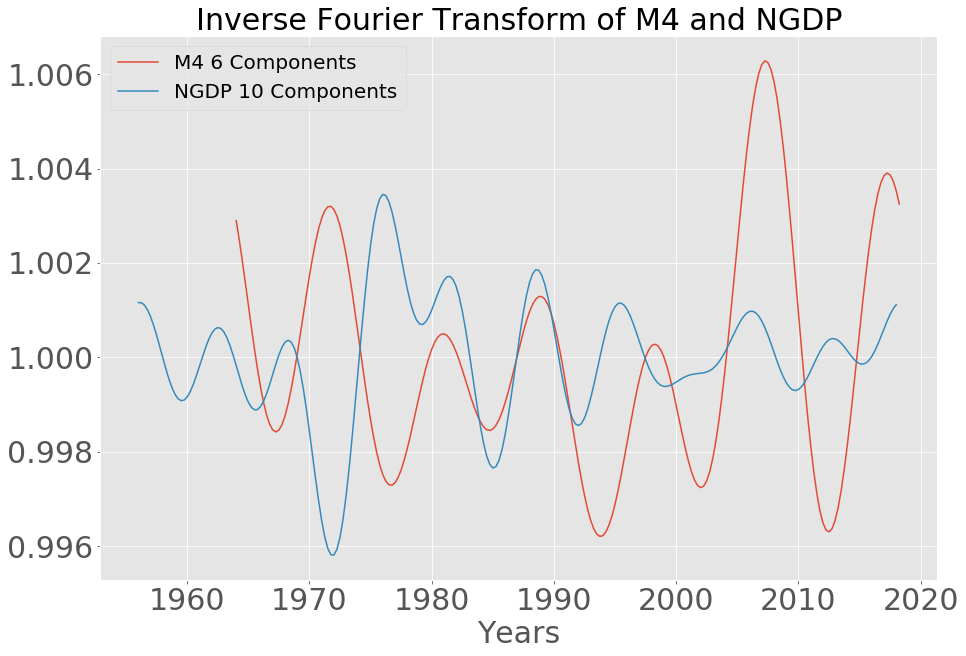

In [57]:
plt.figure(figsize=(15,10))
plt.plot(x,ifft,label='M4 6 Components')
plt.plot(x1,ifft1,label='NGDP 10 Components')

plt.title('Inverse Fourier Transform of M4 and NGDP',fontsize=30)
plt.ylabel('',fontsize=30)
plt.xlabel('Years',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.savefig(direc_save+'M4_NGDP_Inv_period')

/home/samuel/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(array([0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07]),
 <a list of 10 Text yticklabel objects>)

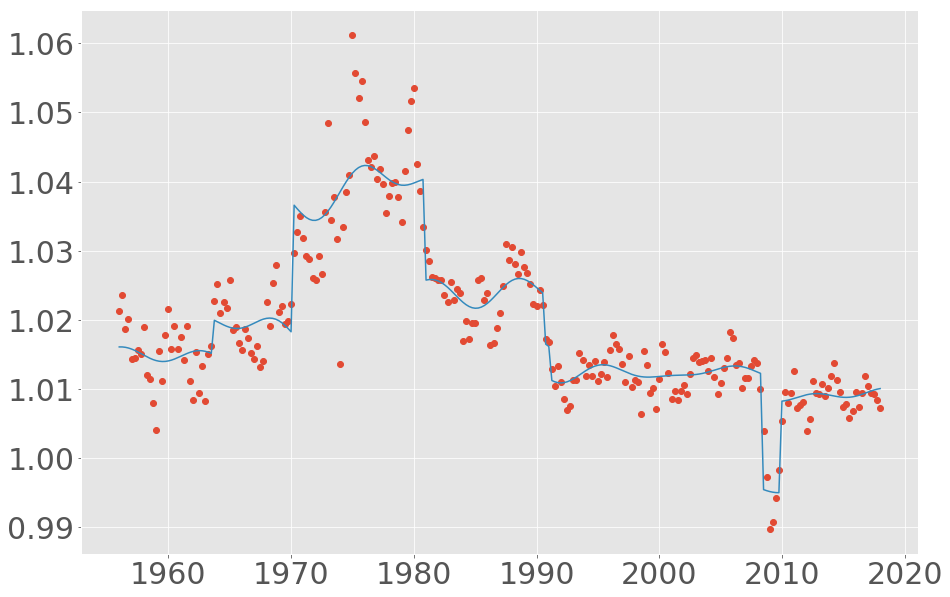

In [58]:
plt.figure(figsize=(15,10))

#plt.plot(xM4smooth,yM4smooth,'o')
#plt.plot(xM4smooth,ifft*y_1M4smooth)

plt.plot(xNGDPsmooth,yNGDPsmooth,'o')
plt.plot(x1,ifft1*y_2NGDPsmooth)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Real GDP

In [59]:
RGDP=direc+'UKRGDP.csv'

dataRGDP=pd.read_csv(RGDP)
dataRGDP=dataRGDP.values
xRGDP=dataRGDP[:,0]
yRGDP=dataRGDP[:,1]
#yRGDP=yRGDP.astype(np.float)
datesq=xRGDP[77:len(xRGDP)]
yRGDPq=yRGDP[77:len(yRGDP)]
yRGDPq=np.asarray(yRGDPq,float)

datesRGDP=np.arange(1955,2018.5,0.25)

(array([ 50000., 100000., 150000., 200000., 250000., 300000., 350000.,
        400000., 450000., 500000., 550000.]),
 <a list of 11 Text yticklabel objects>)

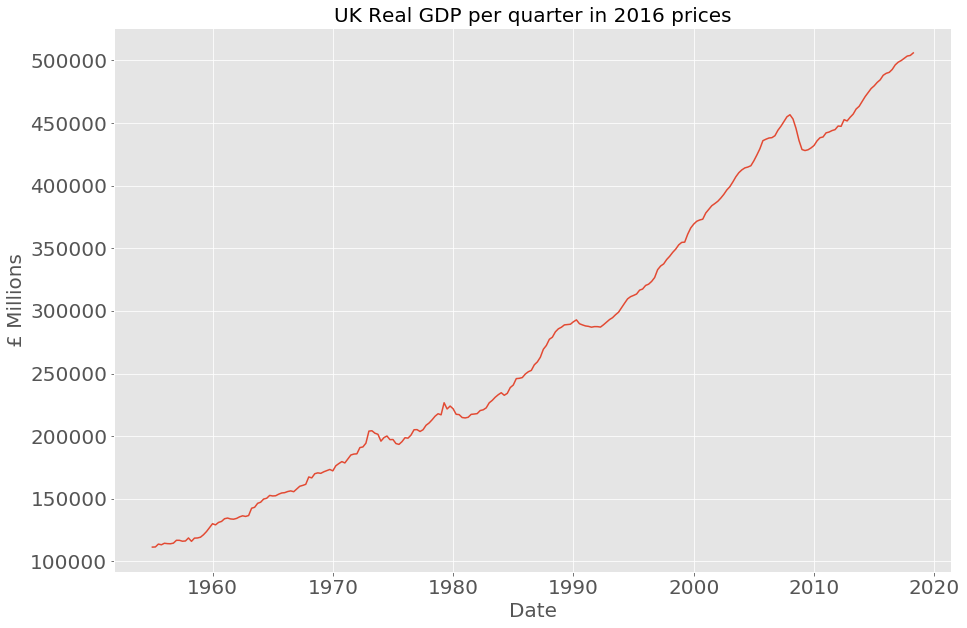

In [60]:
plt.figure(figsize=(15,10))
plt.plot(datesRGDP,yRGDPq)
plt.xlabel('Date',fontsize=20)
plt.ylabel('£ Millions',fontsize=20)
plt.title('UK Real GDP per quarter in 2016 prices',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [61]:
RGDP_rate_of_change=rate_of_change(yRGDPq)
datesRGDProc=datesRGDP[1:len(datesRGDP)]

RGDProc_smooth=running_mean(RGDP_rate_of_change,4)
datesRGDProc_smooth=datesRGDProc[3:len(datesRGDProc)]

In [62]:
r1=adfuller(RGDP_rate_of_change)
r2=adfuller(RGDProc_smooth)

print(r1)
print('')
print(r2)

(-6.895883573630205, 1.3193078789637792e-09, 2, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -1530.0972534478024)

(-3.084479403177709, 0.02772330781688254, 16, 233, {'1%': -3.458731141928624, '5%': -2.8740258764297293, '10%': -2.5734243167124093}, -2092.983264690598)


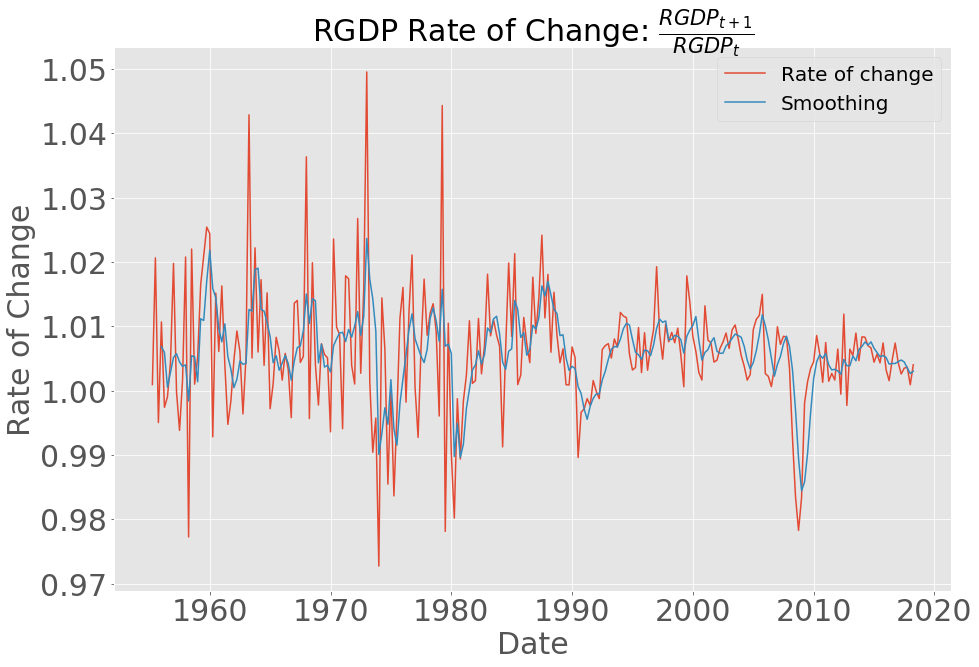

In [63]:
plt.figure(figsize=(15,10))
plt.plot(datesRGDProc,RGDP_rate_of_change,label='Rate of change')
plt.plot(datesRGDProc_smooth,RGDProc_smooth,label='Smoothing')
plt.title(r'RGDP Rate of Change: $\frac{RGDP_{t+1}}{RGDP_{t}}$',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Rate of Change',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

(array([-0.0001,  0.    ,  0.0001,  0.0002,  0.0003,  0.0004,  0.0005]),
 <a list of 7 Text yticklabel objects>)

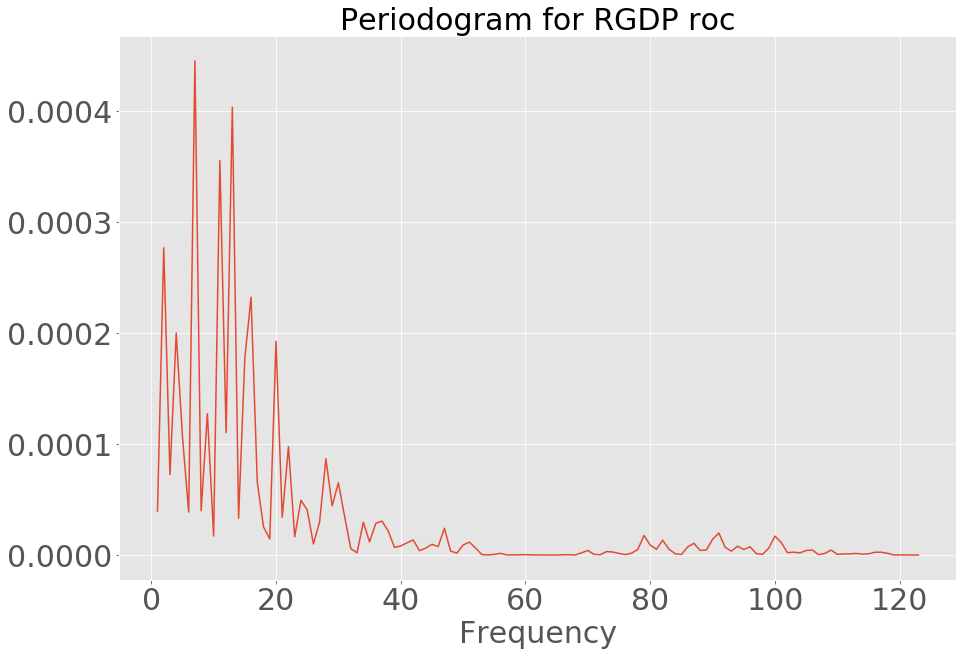

In [64]:
plt.figure(figsize=(15,10))
#p2=periodogram(RGDP_rate_of_change)
p2=periodogram(RGDProc_smooth)

q2=int((len(p2)-1)/2)
plt.plot(range(1,q2),p2[1:q2])
plt.title('Periodogram for RGDP roc',fontsize=30)
plt.xlabel('Frequency',fontsize=30)

# plt.axvline(10,color='black',linestyle='--')
# plt.axvline(16,color='black',linestyle='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

#plt.text(6,-0.00002,'10',fontsize=30)

In [65]:
regr_1RGDP = DecisionTreeRegressor(max_depth=2)
regr_2RGDP= DecisionTreeRegressor(max_depth=5)

xRGDPsmooth=datesRGDProc_smooth.reshape(-1,1)
yRGDPsmooth=RGDProc_smooth.reshape(-1,1)

regr_1RGDP.fit(xRGDPsmooth,yRGDPsmooth)
regr_2RGDP.fit(xRGDPsmooth,yRGDPsmooth)

y_1RGDPsmooth = regr_1RGDP.predict(xRGDPsmooth)
y_2RGDPsmooth = regr_2RGDP.predict(xRGDPsmooth)

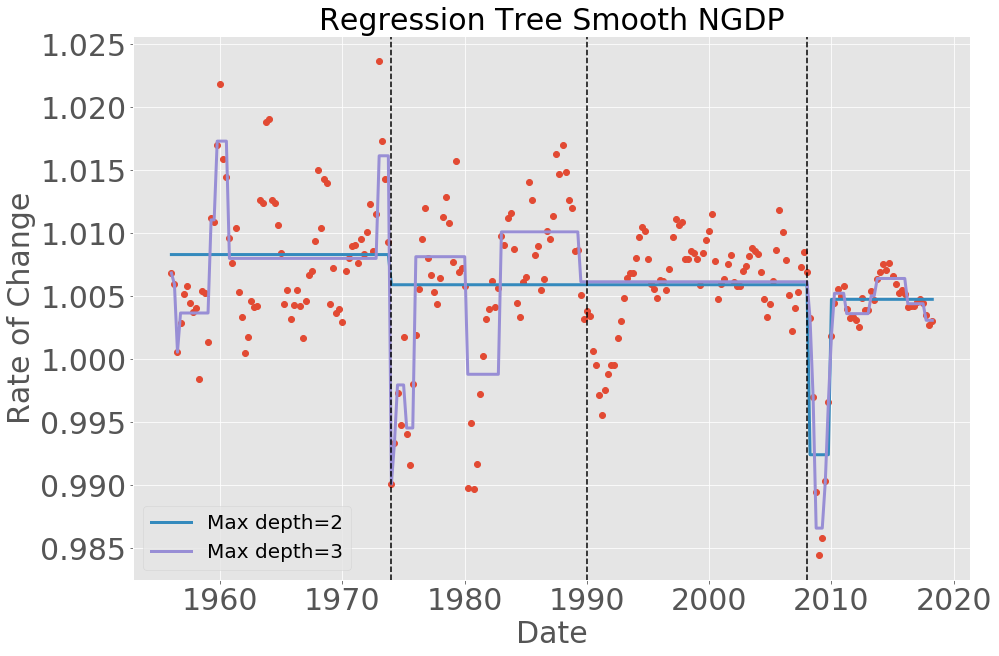

In [66]:
plt.figure(figsize=(15,10))
plt.plot(xRGDPsmooth,yRGDPsmooth,'o')
plt.plot(xRGDPsmooth,y_1RGDPsmooth,linewidth=3,label='Max depth=2')
plt.plot(xRGDPsmooth,y_2RGDPsmooth,linewidth=3,label='Max depth=3')
plt.title('Regression Tree Smooth NGDP',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Rate of Change',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(1974,color='black',linestyle='--')
plt.axvline(1990,color='black',linestyle='--')
plt.axvline(2008,color='black',linestyle='--')
plt.legend(fontsize=20)

In [67]:
RGDProc_transform=RGDProc_smooth/y_2RGDPsmooth

(array([-2.0e-05,  0.0e+00,  2.0e-05,  4.0e-05,  6.0e-05,  8.0e-05,
         1.0e-04,  1.2e-04,  1.4e-04]), <a list of 9 Text yticklabel objects>)

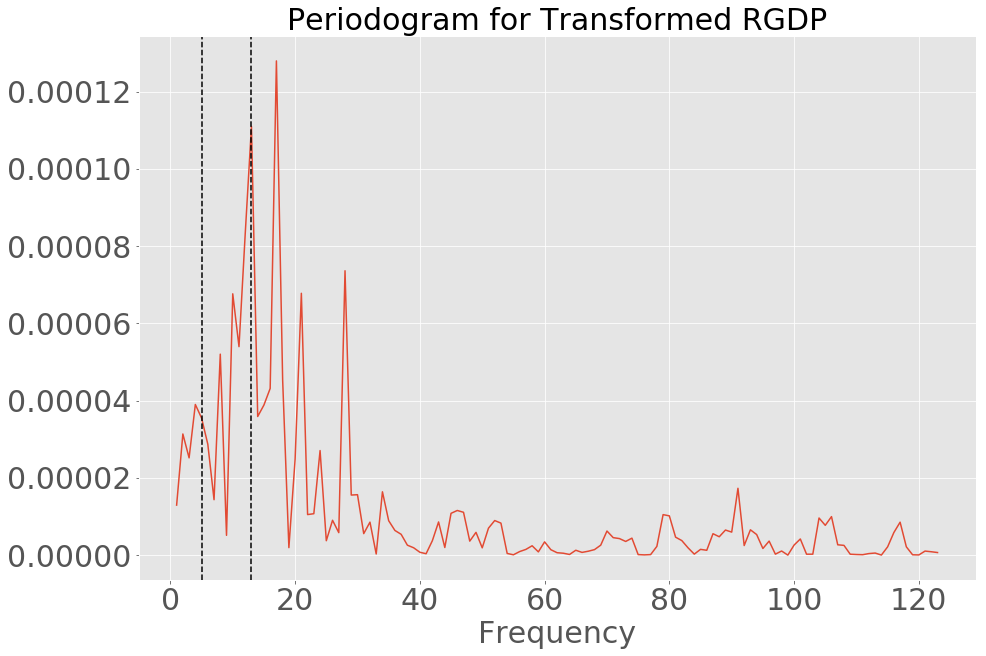

In [68]:
plt.figure(figsize=(15,10))
periodsRGDProc_transform=periodogram(RGDProc_transform)

frequenciesRGDProc=int((len(periodsRGDProc_transform)-1)/2)
plt.plot(range(1,frequenciesRGDProc),periodsRGDProc_transform[1:frequenciesRGDProc])
plt.title('Periodogram for Transformed RGDP',fontsize=30)
plt.xlabel('Frequency',fontsize=30)

plt.axvline(5,color='black',linestyle='--')
plt.axvline(13,color='black',linestyle='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

#plt.text(6,-0.00002,'10',fontsize=30)

/home/samuel/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


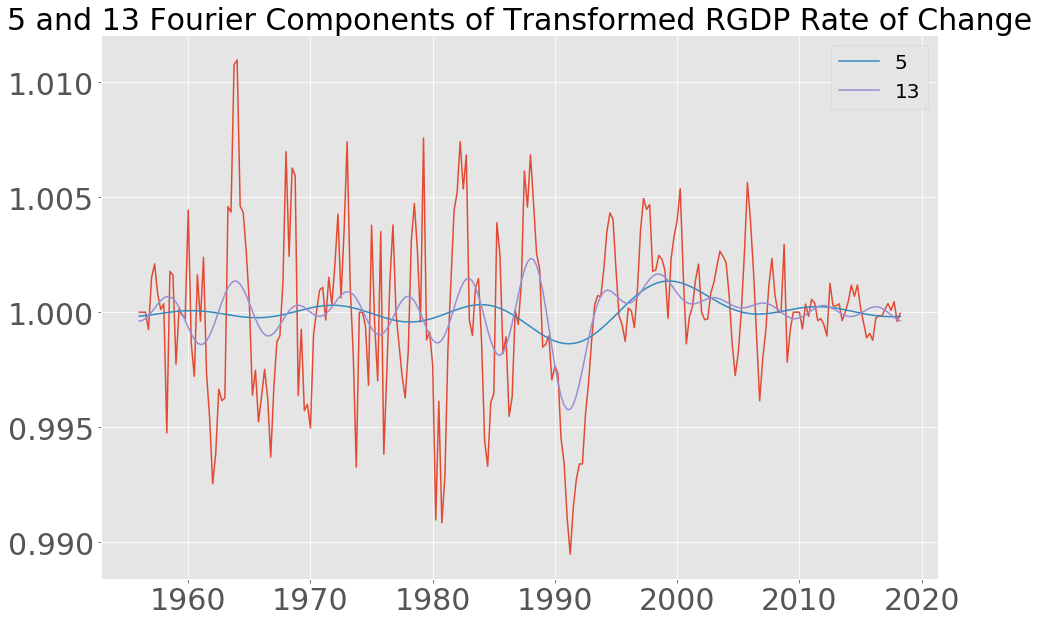

In [69]:
plt.figure(figsize=(15,10))
x3=xRGDPsmooth
y3=RGDProc_transform

n = len(y3)
Y3=np.fft.fft(y3)
Y4=np.fft.fft(y3)

c=5
#np.put(Y1, range(0, c), 0.0)
np.put(Y3, range(c+1, n), 0.0)

c1=13

np.put(Y4, range(c1+1, n), 0.0)

ifft3=np.fft.ifft(Y3)
ifft4=np.fft.ifft(Y4)

plt.plot(x3,y3)
plt.plot(x3,ifft3,label='5')
plt.plot(x3,ifft4,label='13')

plt.title('{c} and {c1} Fourier Components of Transformed RGDP Rate of Change'.format(c=c,c1=c1),fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.legend(fontsize=20)

# Examples

In [70]:
N=100
k=4
f=[]
X=[]
for i in range(N):
    x=2*np.pi* k*i/N
    c=np.cos(x)
    X.append(x)
    f.append(c)

In [71]:
per=(2*np.pi*(N-1))/N

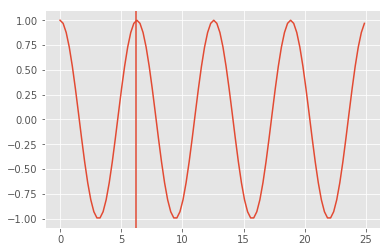

In [72]:
plt.plot(X,f)
plt.axvline(per)

In [73]:
x=np.arange(0,2*np.pi,0.1)

y1=x+np.sin(3*x)
y2=x
y3=np.ones(len(x))

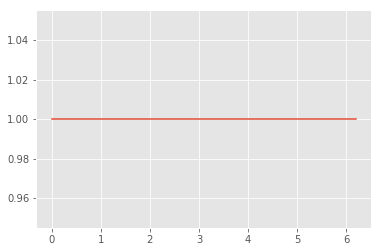

In [74]:
plt.plot(x,y3)

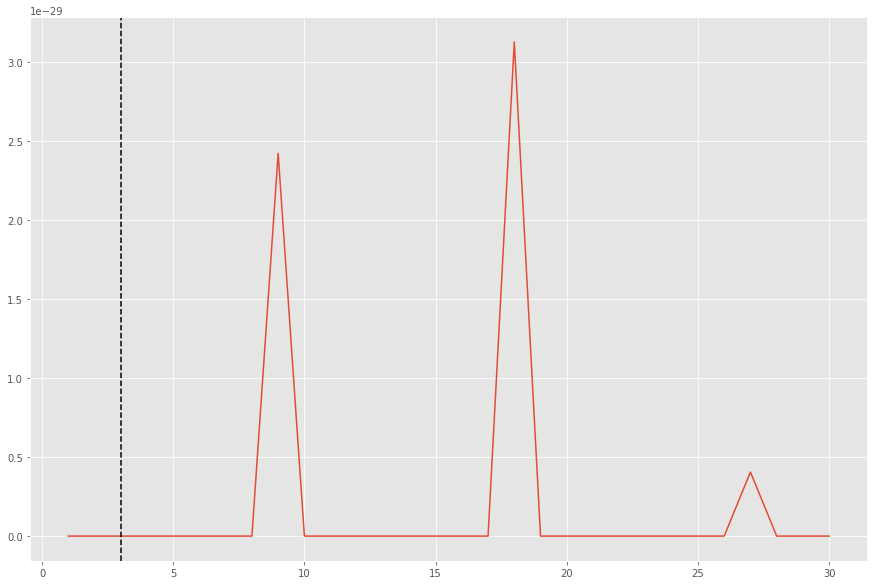

In [75]:
p1=periodogram(y3)

q1=int((len(p1)-1)/2)

plt.figure(figsize=(15,10))

plt.plot(range(1,q1),p1[1:q1])

plt.axvline(3,color='black',linestyle='--')

In [76]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

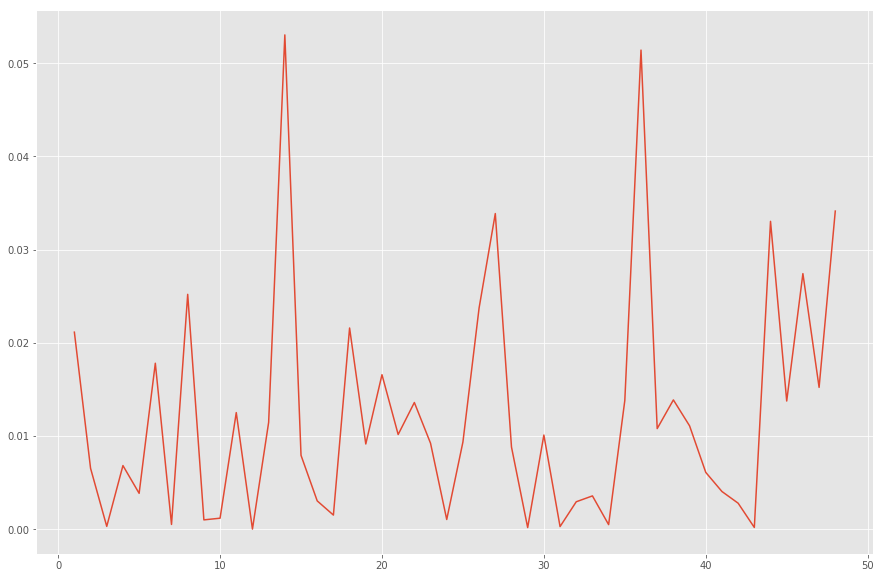

In [77]:
periodogram_rs=periodogram(s)

frequencies_rs=int((len(periodogram_rs)-1)/2)

plt.figure(figsize=(15,10))

plt.plot(range(1,frequencies_rs),periodogram_rs[1:frequencies_rs])

#plt.axvline(3,color='black',linestyle='--')

# Correlations

In [79]:
M4roc_transform1
xM4smooth

array([[1964.  ],
       [1964.25],
       [1964.5 ],
       [1964.75],
       [1965.  ],
       [1965.25],
       [1965.5 ],
       [1965.75],
       [1966.  ],
       [1966.25],
       [1966.5 ],
       [1966.75],
       [1967.  ],
       [1967.25],
       [1967.5 ],
       [1967.75],
       [1968.  ],
       [1968.25],
       [1968.5 ],
       [1968.75],
       [1969.  ],
       [1969.25],
       [1969.5 ],
       [1969.75],
       [1970.  ],
       [1970.25],
       [1970.5 ],
       [1970.75],
       [1971.  ],
       [1971.25],
       [1971.5 ],
       [1971.75],
       [1972.  ],
       [1972.25],
       [1972.5 ],
       [1972.75],
       [1973.  ],
       [1973.25],
       [1973.5 ],
       [1973.75],
       [1974.  ],
       [1974.25],
       [1974.5 ],
       [1974.75],
       [1975.  ],
       [1975.25],
       [1975.5 ],
       [1975.75],
       [1976.  ],
       [1976.25],
       [1976.5 ],
       [1976.75],
       [1977.  ],
       [1977.25],
       [1977.5 ],
       [19

In [80]:
NGDProc_transform
xNGDPsmooth

array([[1956.  ],
       [1956.25],
       [1956.5 ],
       [1956.75],
       [1957.  ],
       [1957.25],
       [1957.5 ],
       [1957.75],
       [1958.  ],
       [1958.25],
       [1958.5 ],
       [1958.75],
       [1959.  ],
       [1959.25],
       [1959.5 ],
       [1959.75],
       [1960.  ],
       [1960.25],
       [1960.5 ],
       [1960.75],
       [1961.  ],
       [1961.25],
       [1961.5 ],
       [1961.75],
       [1962.  ],
       [1962.25],
       [1962.5 ],
       [1962.75],
       [1963.  ],
       [1963.25],
       [1963.5 ],
       [1963.75],
       [1964.  ],
       [1964.25],
       [1964.5 ],
       [1964.75],
       [1965.  ],
       [1965.25],
       [1965.5 ],
       [1965.75],
       [1966.  ],
       [1966.25],
       [1966.5 ],
       [1966.75],
       [1967.  ],
       [1967.25],
       [1967.5 ],
       [1967.75],
       [1968.  ],
       [1968.25],
       [1968.5 ],
       [1968.75],
       [1969.  ],
       [1969.25],
       [1969.5 ],
       [19

In [88]:
xNGDPsmooth1964_2018=xNGDPsmooth[32:]
xM4smooth1964_2018=xM4smooth[:len(xM4smooth)-1]

M4roc_transform1964_2018=M4roc_transform1[:len(M4roc_transform1)-1]
NGDProc_transform1964_2018=NGDProc_transform[32:]

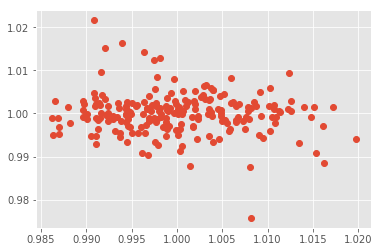

In [90]:
plt.plot(M4roc_transform1964_2018,NGDProc_transform1964_2018,'o')

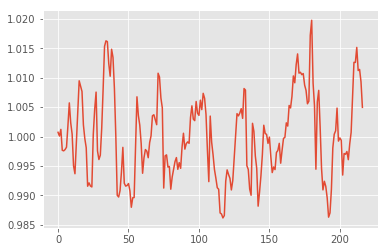

In [91]:
plt.plot(M4roc_transform1964_2018)

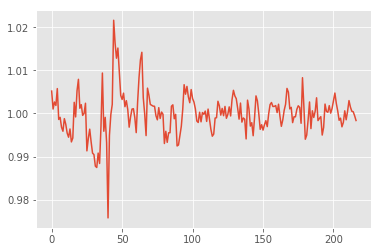

In [92]:
plt.plot(NGDProc_transform1964_2018)

In [93]:
from scipy import stats

Test for normality https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
for Pearson's rank correlation coefficient assumption

In [94]:
stats.normaltest(M4roc_transform1964_2018)

NormaltestResult(statistic=6.649141980702751, pvalue=0.03598795462189171)

In [95]:
stats.normaltest(NGDProc_transform1964_2018)

NormaltestResult(statistic=31.817612311902856, pvalue=1.2328018368525628e-07)

In [97]:
stats.pearsonr(M4roc_transform1964_2018,NGDProc_transform1964_2018)

(-0.10170003855459481, 0.13534377333872263)

In [96]:
stats.spearmanr(M4roc_transform1964_2018,NGDProc_transform1964_2018)

SpearmanrResult(correlation=-0.0018073817274764303, pvalue=0.9788819493997104)

In [102]:
ifft_M4=np.real(ifft)
ifft_M41964_2018=ifft_M4[:len(ifft_M4)-1]
ifft_NGDP=np.real(ifft1)
ifft_NGDP1964_2018=ifft_NGDP[32:]

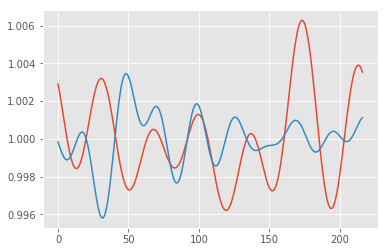

In [105]:
plt.plot(ifft_M41964_2018)
plt.plot(ifft_NGDP1964_2018)

In [106]:
stats.pearsonr(ifft_M41964_2018,ifft_NGDP1964_2018)

(-0.15892678211050273, 0.019153805898997164)

In [107]:
stats.spearmanr(ifft_M41964_2018,ifft_NGDP1964_2018)

SpearmanrResult(correlation=-0.06538400108983122, pvalue=0.337745302221927)